In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Start by finding the default configuration

In [4]:
folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_dual_NN_EDL/'

# Plot for buff size 
data_buff=[]
plt.figure(figsize=(16, 9) )
for i in [1000, 1500, 2000, 2500, 3000, 3500, 4000]:
    file_name= folder_+'rewards_buff_size__'+str(i)+'_0.5_20_.csv'
    data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
    data = data[(data.shape[0]-60):,:]
    print(data.shape)
    plt.plot(data, label=str(i))
    data_buff.append(data)

plt.legend()
plt.show()

OSError: /home/kraghavan/Projects/RL/RL_Cartpole/data_dual_NN_EDL/rewards_buff_size__1000_0.5_20_.csv not found.

<Figure size 1152x648 with 0 Axes>

In [72]:
folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_single_NN_SGD/'
# Plot for buff size 
data_buff_SGD=[]
for i in [1000, 1500, 2000, 2500, 3000, 3500, 4000]:
    file_name= folder_+'rewards_buff_size__'+str(i)+'_0_20_.csv'
    data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
    print(data.shape)
    data = data[(data.shape[0]-60):,:]
    data_buff_SGD.append(data)

(76, 1)
(68, 1)
(63, 1)
(75, 1)
(72, 1)
(80, 1)
(66, 1)


In [73]:
data_ours = np.array(data_buff).reshape([7,60])
data_grad = np.array(data_buff_SGD).reshape([7,60])
print(data_grad.shape)
print(data_ours.shape)

(7, 60)
(7, 60)


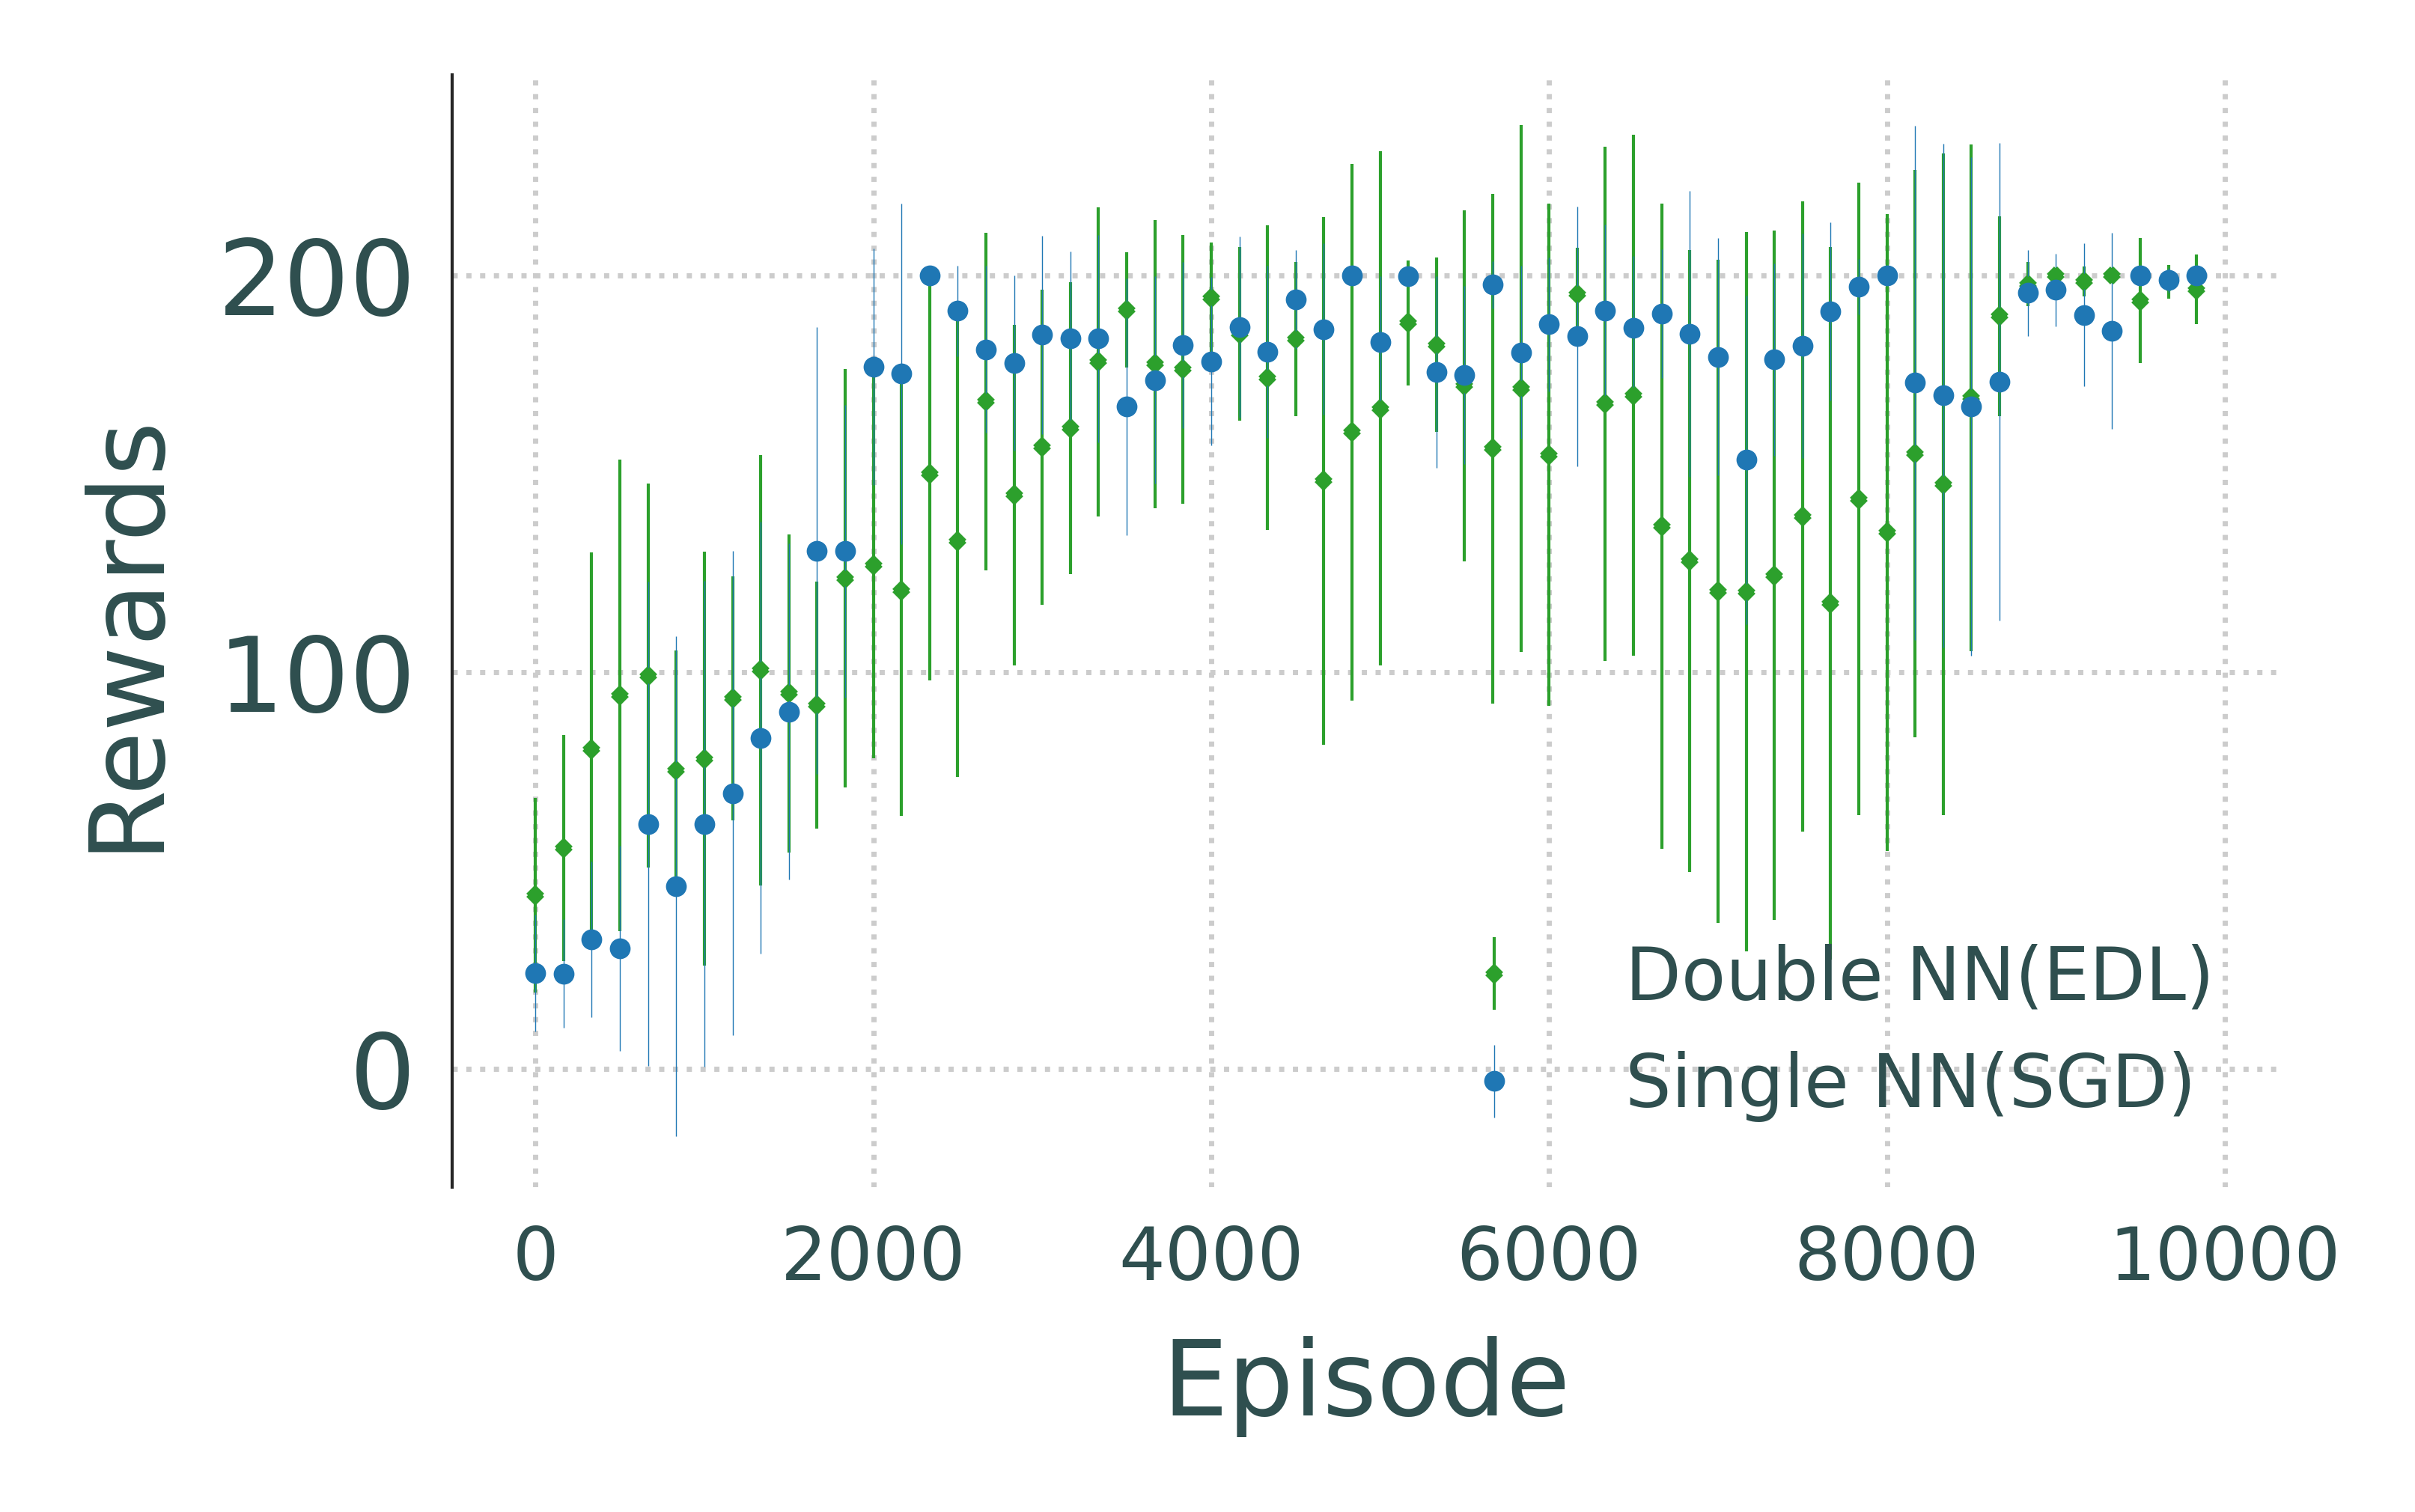

In [74]:
# Let us create some plots with these
import matplotlib.pyplot as plt
def cm2inch(value):
    return value/2.54
small = 7
med = 10
large = 12
plt.style.use('seaborn-white')
COLOR = 'darkslategray'
params = {'axes.titlesize': small,
    'legend.fontsize': small,
    'figure.figsize': (cm2inch(8),cm2inch(5)),
    'axes.labelsize': med,
    'axes.titlesize': small,
    'xtick.labelsize': small,
    'ytick.labelsize': med,
    'figure.titlesize': small, 
    'font.family': "sans-serif",
    'font.sans-serif': "Myriad Hebrew",
        'text.color' : COLOR,
        'axes.labelcolor' : COLOR,
        'axes.linewidth' : 0.3,
        'xtick.color' : COLOR,
        'ytick.color' : COLOR}

plt.rcParams.update(params)
plt.rc('text', usetex = False)
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',\
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams['mathtext.fontset'] = 'cm'

from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
large = 24; med = 8; small = 7


fig,a =  plt.subplots(1,1, sharex = False, dpi = 1000, gridspec_kw = {'wspace':0.3, 'hspace':0.3})
# Some Plot oriented settings 
a.spines["top"].set_visible(False)    
a.spines["bottom"].set_visible(False)    
a.spines["right"].set_visible(False)    
a.spines["left"].set_visible(True)  
a.grid(linestyle=':', linewidth=0.5)
a.get_xaxis().tick_bottom()    
a.get_yaxis().tick_left()  



mean = np.mean(data_ours, axis = 0)
std = np.std(data_ours, axis = 0)
t = np.arange(60)*(10000/60)
a.errorbar(t, mean, yerr = std, fmt = 'x', color = color[2], ms = 1, linewidth = 0.3, label = 'Double NN(EDL)')


mean = np.mean(data_grad, axis = 0)
std = np.std(data_grad, axis = 0)
a.errorbar(t, mean, yerr = std, fmt = 'o', color = color[0], ms = 1, linewidth = 0.1, label = 'Single NN(SGD)')
a.set_xlabel('Episode')
a.set_ylabel('Rewards')
a.legend()

# plt.savefig('Rewards_Mean_value_diff_buffer_size.eps', dpi = 1000,  bbox_inches='tight')
    
plt.show()

(91, 1)
(87, 1)
(81, 1)
(88, 1)
(94, 1)


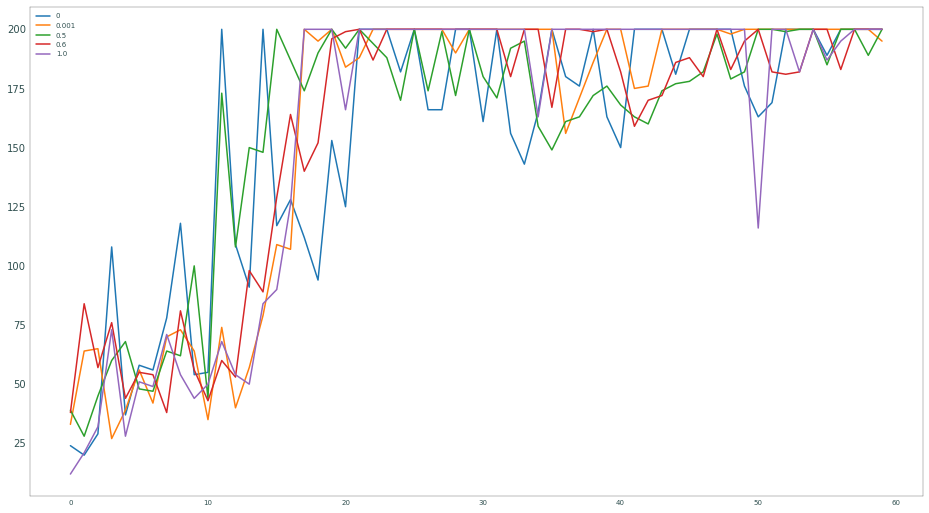

In [79]:
folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_dual_NN_EDL/'
# Plot for buff size 

plt.figure(figsize=(16, 9) )

data_buff_SGD=[]
for i in [0, 0.001,  0.5, 0.6, 1.0]:
    file_name= folder_+'rewards_explo_Rate__5000_'+str(i)+'_20_.csv'
    data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
    print(data.shape)
    data = data[(data.shape[0]-60):,:]
    plt.plot(data, label=str(i))
        
        
    data_buff_SGD.append(data)
    
plt.legend()
plt.show()

(86, 1)


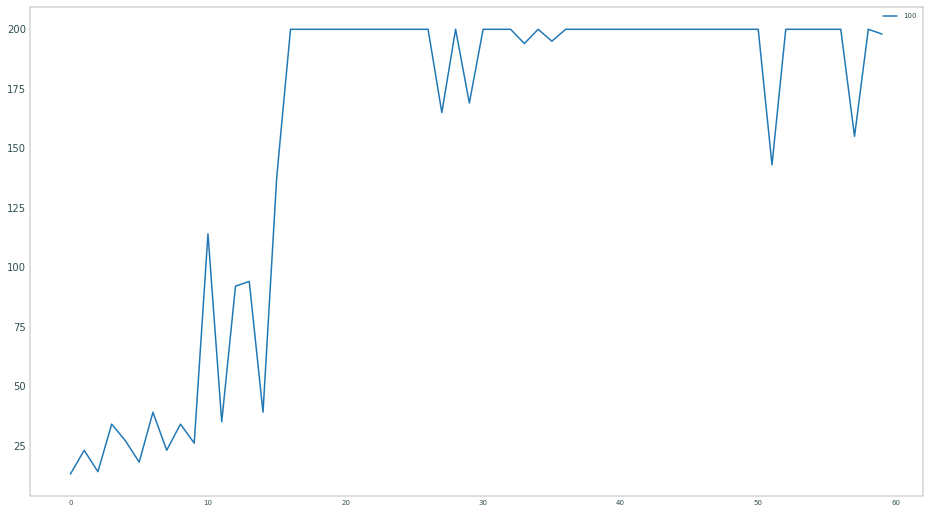

In [83]:
folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_dual_NN_EDL/'
# Plot for buff size 

plt.figure(figsize=(16, 9) )

data_buff_SGD=[]
for i in [100]:
    file_name= folder_+'rewards_update_step__5000_0.5_'+str(i)+'_.csv'
    data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
    print(data.shape)
    data = data[(data.shape[0]-60):,:]
    plt.plot(data, label=str(i))
        
        
    data_buff_SGD.append(data)
    
plt.legend()
plt.show()



(95, 1)
(76, 1)
(102, 1)


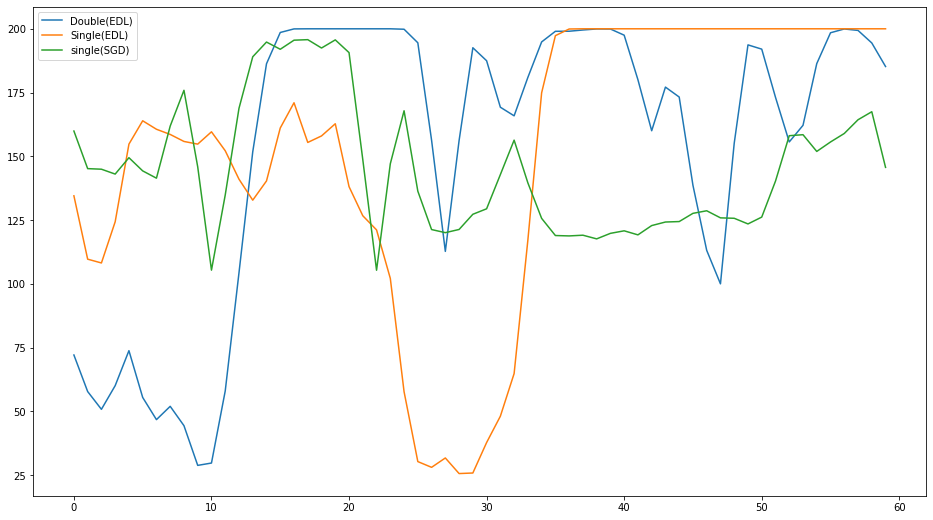

In [5]:
## Defaults

plt.figure(figsize=(16, 9) )
from scipy.ndimage import gaussian_filter1d


folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_dual_NN_EDL/'
file_name= folder_+'rewards_dual_default_v2_.csv'
data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
print(data.shape)
data = gaussian_filter1d(data[(data.shape[0]-60):,:].reshape([-1]), 0.85)
plt.plot(data, label='Double(EDL)' )

    
# folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_dual_NN_SGD/'
# file_name= folder_+'rewards_dual_default__.csv'
# data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
# print(data.shape)
# data = data[(data.shape[0]-70):,:]
# plt.plot(data, label='Double(SGD)')

    
folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_single_NN_EDL/'
file_name= folder_+'rewards_default_v2_.csv'
data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
print(data.shape)
data = gaussian_filter1d(data[(data.shape[0]-60):,:].reshape([-1]), 0.85 )
plt.plot(data, label='Single(EDL)')

folder_ = '/home/kraghavan/Projects/RL/RL_Cartpole/data_single_NN_SGD/'
file_name= folder_+'rewards_default_v2_.csv'
data= np.loadtxt(file_name, delimiter = ',').reshape([-1,1])
print(data.shape)
data = gaussian_filter1d(data[(data.shape[0]-60):,:].reshape([-1]), 0.85)
plt.plot(data, label='single(SGD)')


plt.legend()
# plt.savefig()